In [254]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns
from matplotlib.gridspec import GridSpec
import scanpy as sc
import muon as mu
import graphtools
import magic
from matplotlib.pyplot import rc_context
from matplotlib import gridspec
import os


from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../Code/')
from utils import read_dataset_log

from starcat import starCAT
from sklearn.metrics import balanced_accuracy_score


In [2]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
figdir = '../../../Figures/Components'

In [4]:
harmony_vars = ['donor']

In [5]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label,tcat_fn_old
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCA

# Prepare markers

In [6]:
dataset = 'AMP-RA'

In [7]:
raw_counts_fn = params.loc[dataset, 'raw_counts_fn']#'/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBAT-CITESeq-DATA.Raw.T.ADTfixed.h5ad'
raw_counts_fn

'/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_ADT.RNA_counts.raw.ADTfixed.h5ad'

In [8]:
outdir = '../../../Data/PerDataset/AMPRA'

In [9]:
adata = sc.read(raw_counts_fn)
# adata.obs['frac_ADT'] = adata.obs['nCount_ADT'] / (adata.obs['nCount_ADT'] + adata.obs['nCount_RNA'])
ind = adata.var['feature_types']=='Antibody Capture'

Only considering the two last: ['.ADTfixed', '.h5ad'].
Only considering the two last: ['.ADTfixed', '.h5ad'].


/PHShome/dk718/miniforge3/envs/py310/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


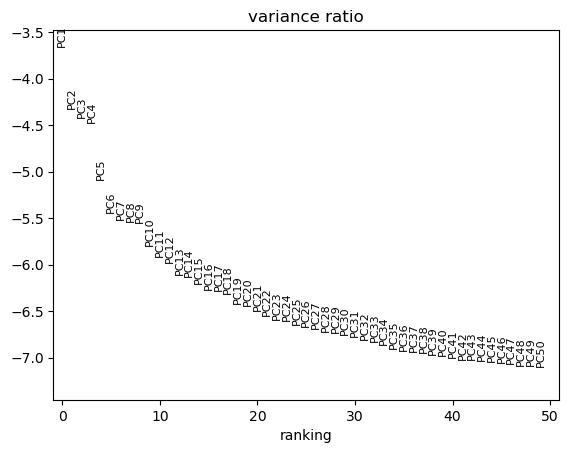

In [10]:
adata_RNA = adata[:,~ind].copy()
sc.pp.highly_variable_genes(adata_RNA, flavor='seurat_v3', n_top_genes=2000)
sc.pp.normalize_per_cell(adata_RNA, counts_per_cell_after=1e4)
sc.pp.log1p(adata_RNA)
sc.pp.scale(adata_RNA, zero_center=False)
sc.tl.pca(adata_RNA, use_highly_variable=True, zero_center=True)
sc.pl.pca_variance_ratio(adata_RNA, log=True, n_pcs=50)

In [11]:
sc.external.pp.harmony_integrate(adata_RNA,  harmony_vars, max_iter_harmony = 30)


2024-09-30 21:20:04,362 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-09-30 21:20:14,535 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-09-30 21:20:15,103 - harmonypy - INFO - Iteration 1 of 30
2024-09-30 21:21:26,653 - harmonypy - INFO - Iteration 2 of 30
2024-09-30 21:22:40,384 - harmonypy - INFO - Iteration 3 of 30
2024-09-30 21:23:45,288 - harmonypy - INFO - Iteration 4 of 30
2024-09-30 21:24:35,583 - harmonypy - INFO - Iteration 5 of 30
2024-09-30 21:25:16,380 - harmonypy - INFO - Iteration 6 of 30
2024-09-30 21:25:47,025 - harmonypy - INFO - Converged after 6 iterations


In [12]:
sc.pp.neighbors(adata_RNA, n_neighbors=5, n_pcs=39, use_rep='X_pca_harmony')

In [13]:
outfn = os.path.join(outdir, 'RNA_logTP1K_ForMAGIC.h5ad')
print(outfn)

../../../Data/PerDataset/AMPRA/RNA_logTP1K_ForMAGIC.h5ad


In [14]:
adata_RNA.write(outfn)

In [15]:
adata_RNA = sc.read(outfn)

Neighbors function kills kernel. Return to whatever this environment issue is later if necessary.

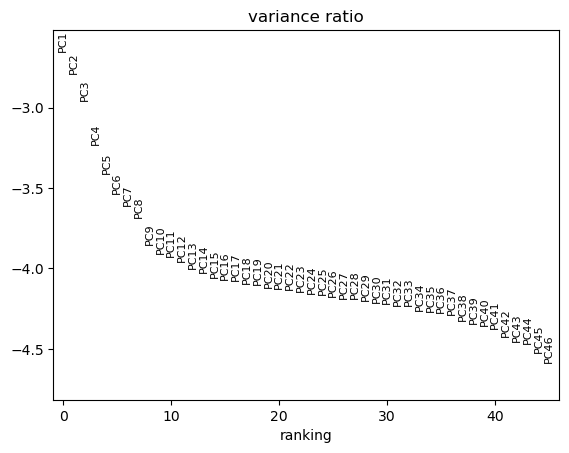

In [16]:
adata_ADT = adata[:,ind].copy()
sc.pp.normalize_per_cell(adata_ADT, counts_per_cell_after=1e4)
Z = adata_ADT.X.todense()
Z[Z==0] = np.nan
gmean = np.exp(np.nansum(np.log(Z+1), axis=1) / Z.shape[1])
Z = np.log((Z / gmean) + 1)
Z[np.isnan(Z)]=0
adata_ADT.X = np.array(Z)

sc.pp.scale(adata_ADT, zero_center=False, max_value=15)

sc.tl.pca(adata_ADT, zero_center=True)
sc.pl.pca_variance_ratio(adata_ADT, log=True, n_pcs=45)

In [17]:
sc.external.pp.harmony_integrate(adata_ADT,  harmony_vars, max_iter_harmony = 30)

2024-09-30 21:26:30,588 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-09-30 21:26:45,359 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-09-30 21:26:46,003 - harmonypy - INFO - Iteration 1 of 30
2024-09-30 21:27:45,984 - harmonypy - INFO - Iteration 2 of 30
2024-09-30 21:28:53,504 - harmonypy - INFO - Iteration 3 of 30
2024-09-30 21:29:52,159 - harmonypy - INFO - Converged after 3 iterations


In [18]:
sc.pp.neighbors(adata_ADT, n_neighbors=5, n_pcs=44, use_rep='X_pca_harmony')

In [19]:
outfn = os.path.join(outdir, 'ADT_TP10KCLR_ForMAGIC.h5ad')
print(outfn)

../../../Data/PerDataset/AMPRA/ADT_TP10KCLR_ForMAGIC.h5ad


In [20]:
adata_ADT.write(outfn)

In [21]:
adata_ADT = sc.read(outfn)

In [22]:
rna_markers = ['CD3D', 'CD4', 'CD8A', 'TRAC', 'TRGC1', 'TRDC', 'KLRB1', 'SLC4A10', 'TRBC1', 'IL2RA', 'FOXP3', 'SELL', 'CCR7', 'KLRB1', 'RTKN2', 'IL7R', 'PASK', 'GATA3',
               'CCR4', 'STAT1', 'IRF4', 'TBX21', 'IFNG', 'CCR5', 'CXCR3', 'CCR6', 'CCL20', 'IL4R', 'IL4', 'STAT4',  'STAT6',  'CCR1', 'IL10',
               'IL17B', 'IL17A', 'IL17F', 'IL17D', 'IL17C', 'RORC', 'RORA', 'STAT3']

In [23]:
set(rna_markers) - set(adata_RNA.var.index)

set()

In [189]:
adt_markers = ['AB_CD3-1', 'AB_CD4-1', 'AB_CD19', 'AB_CD20', 'AB_CD161', 
               'AB_CD8a', 'AB_CD45RA', 'AB_CD45RO',  'AB_CD161',  'AB_CD195', 'AB_CD196', 
               'AB_CD127', 
               'AB_CD27-2',
               'AB_CD31', 
               'AB_CD314',
               'AB_CD38-1'] 

In [190]:
set(adt_markers) - set(adata_ADT.var.index)

set()

In [191]:
sorted(adata_ADT.var.index)

['AB_CD107a',
 'AB_CD112',
 'AB_CD119',
 'AB_CD11b-2',
 'AB_CD11c',
 'AB_CD127',
 'AB_CD14-2',
 'AB_CD140a',
 'AB_CD141',
 'AB_CD144',
 'AB_CD146',
 'AB_CD155',
 'AB_CD16',
 'AB_CD161',
 'AB_CD163',
 'AB_CD19',
 'AB_CD192',
 'AB_CD195',
 'AB_CD196',
 'AB_CD1c',
 'AB_CD20',
 'AB_CD206',
 'AB_CD209',
 'AB_CD21',
 'AB_CD226-1',
 'AB_CD24',
 'AB_CD27-2',
 'AB_CD273',
 'AB_CD274',
 'AB_CD278',
 'AB_CD279',
 'AB_CD3-1',
 'AB_CD304',
 'AB_CD309',
 'AB_CD31',
 'AB_CD314',
 'AB_CD34',
 'AB_CD38-1',
 'AB_CD4-1',
 'AB_CD44-1',
 'AB_CD45-1',
 'AB_CD45RA',
 'AB_CD45RO',
 'AB_CD55',
 'AB_CD56-2',
 'AB_CD64',
 'AB_CD68',
 'AB_CD69',
 'AB_CD86',
 'AB_CD8a',
 'AB_CD90',
 'AB_CX3CR1',
 'AB_EGFR',
 'AB_Folate',
 'AB_HLA-DR',
 'AB_IgGFc',
 'AB_IgM',
 'AB_Podoplanin']

In [192]:
adt_markers = list(set(adt_markers).intersection(adata_ADT.var.index))

In [193]:
G = graphtools.Graph(data=adata_RNA.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC()
magic_operator.fit(adata_RNA.X, graph=G)
markers_magic = magic_operator.transform(X=adata_RNA[:, rna_markers].X)
markers_magic = pd.DataFrame(markers_magic, index=adata_RNA.obs.index, columns=rna_markers)

Running MAGIC on 94048 cells and 33538 genes.


/PHShome/dk718/miniforge3/envs/py310/lib/python3.10/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


Using precomputed graph and diffusion operator...


/PHShome/dk718/miniforge3/envs/py310/lib/python3.10/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


Calculating imputation...


/PHShome/dk718/miniforge3/envs/py310/lib/python3.10/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


Calculated imputation in 0.19 seconds.


In [194]:
G = graphtools.Graph(data=adata_ADT.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC()
magic_operator.fit(adata_ADT.X, graph=G)
markers_magic_adt = magic_operator.transform(X=adata_ADT[:, adt_markers].X)
markers_magic_adt = pd.DataFrame(markers_magic_adt, index=adata_ADT.obs.index, columns=adt_markers)

Running MAGIC on 94048 cells and 58 genes.
Using precomputed graph and diffusion operator...
Calculating imputation...
Calculated imputation in 0.06 seconds.


/PHShome/dk718/miniforge3/envs/py310/lib/python3.10/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/PHShome/dk718/miniforge3/envs/py310/lib/python3.10/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


In [195]:
for g in adt_markers:
    markers_magic[g] = markers_magic_adt[g]
    
# markers_magic['frac_ADT'] = adata.obs['frac_ADT']

In [196]:
outfn = os.path.join(outdir, 'ManualGating.MagicMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv')
print(outfn)

../../../Data/PerDataset/AMPRA/ManualGating.MagicMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv


In [197]:
markers_magic.to_csv(outfn, sep='\t')

In [198]:
markers_magic = pd.read_csv(outfn, sep='\t', index_col=0)

In [199]:
markers_magic.head()

,CD3D,CD4,CD8A,TRAC,TRGC1,TRDC,KLRB1,SLC4A10,TRBC1,IL2RA,...,AB_CD127,AB_CD4-1,AB_CD27-2,AB_CD31,AB_CD38-1,AB_CD45RA,AB_CD195,AB_CD8a,AB_CD314,AB_CD45RO
BRI-399_AAACGAATCTGCATGA,2.144682,0.710966,0.130149,2.075448,0.022279,0.019655,0.360222,0.000000,0.922303,0.527704,...,1.544005,2.589820,1.812821,2.024606,2.349800,1.314501,1.945422,0.423442,0.778649,3.158204
BRI-399_AAACGCTTCCTTGACC,2.318297,0.129348,1.855774,2.131739,0.150293,0.005883,0.028792,0.000000,1.186671,0.004256,...,0.756813,1.577385,1.685447,2.502770,2.155248,2.110239,2.545259,0.903625,1.368683,2.083232
BRI-399_AAAGGGCAGCCGGAAT,2.759298,0.858754,0.047722,2.499971,0.000000,0.010707,0.925173,0.002045,1.367092,0.778138,...,0.894837,2.517474,2.638103,2.292490,2.502810,1.320941,1.774706,0.521738,1.074975,3.414062
BRI-399_AAAGGGCCACTATGTG,3.259638,0.036500,1.433924,2.297393,0.763817,1.689556,0.234114,0.000000,1.291324,0.050766,...,0.718834,1.522620,1.587328,2.924098,1.971387,1.883272,2.905343,0.913793,1.335492,2.324807
BRI-399_AAAGGTAGTGCAGGAT,2.631370,0.864280,0.012512,2.649181,0.028389,0.000000,0.112249,0.000000,1.560455,2.303030,...,1.006035,2.632106,2.258432,1.781152,1.670957,1.208221,1.835161,0.368840,0.756356,3.086904


In [200]:
unsmoothed_markers = pd.DataFrame(np.concatenate([adata_RNA[:, rna_markers].X.toarray(), np.array(adata_ADT[:, adt_markers].X)], axis=1), index=adata_RNA.obs.index,
             columns=(rna_markers+adt_markers))

In [201]:
outfn = os.path.join(outdir, 'ManualGating.UnsmoothedMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv')
print(outfn)

../../../Data/PerDataset/AMPRA/ManualGating.UnsmoothedMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv


In [202]:
unsmoothed_markers.to_csv(outfn, sep='\t')

In [203]:
unsmoothed_markers = pd.read_csv(outfn, sep='\t', index_col=0)

In [204]:
markers = list(markers_magic.columns)

# Protein-RNA correlations

In [205]:
from scipy.stats import pearsonr

In [206]:
prot_pairs = [('CD3D', 'AB_CD3-1'),
              ('CD8A', 'AB_CD8a'),
              ('CD4', 'AB_CD4-1'),
             ('KLRB1', 'AB_CD161')]

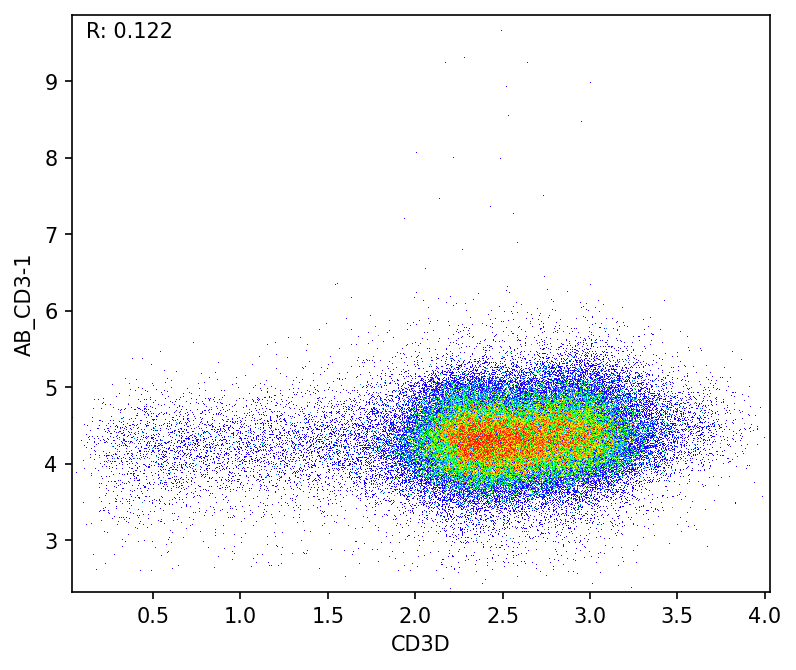

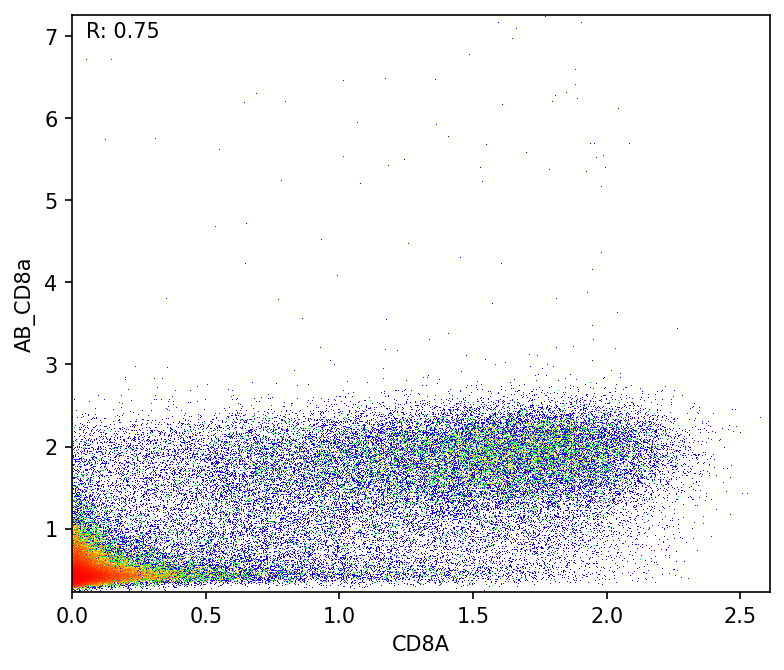

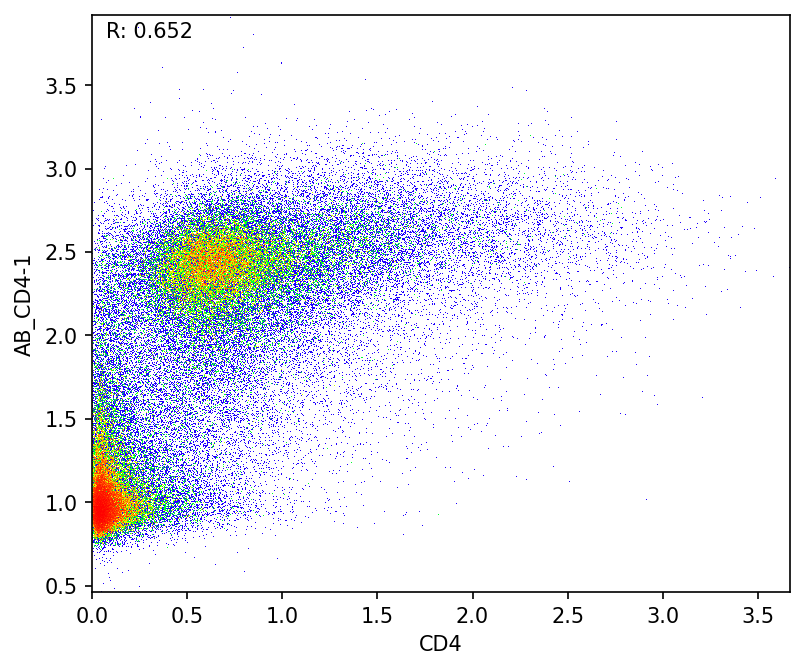

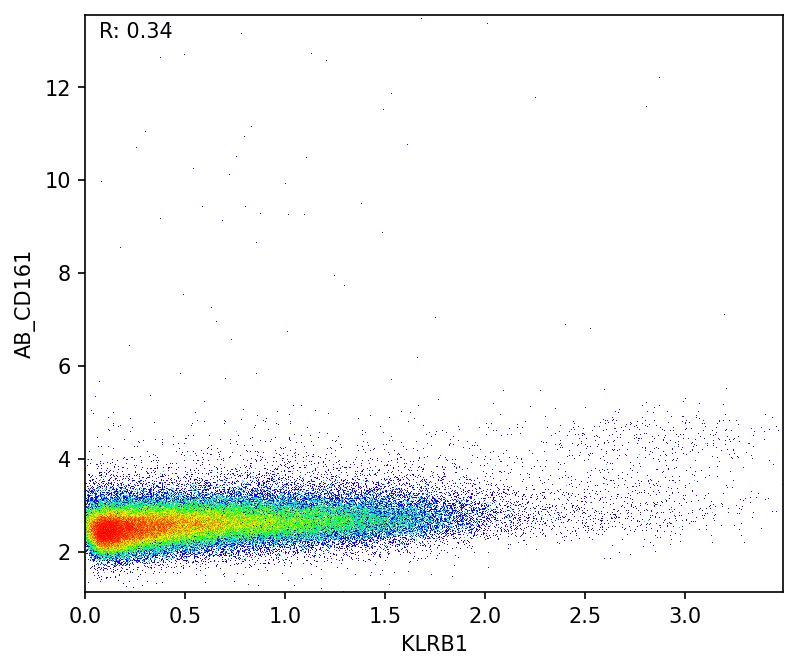

In [207]:
for (gene, prot) in prot_pairs:
    # print(gene, prot)
    r, _ = pearsonr(markers_magic[gene], markers_magic[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':markers_magic[gene], 'y':markers_magic[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(gene)
    ax.set_ylabel(prot)

Compare non MAGIC-smoothed markers


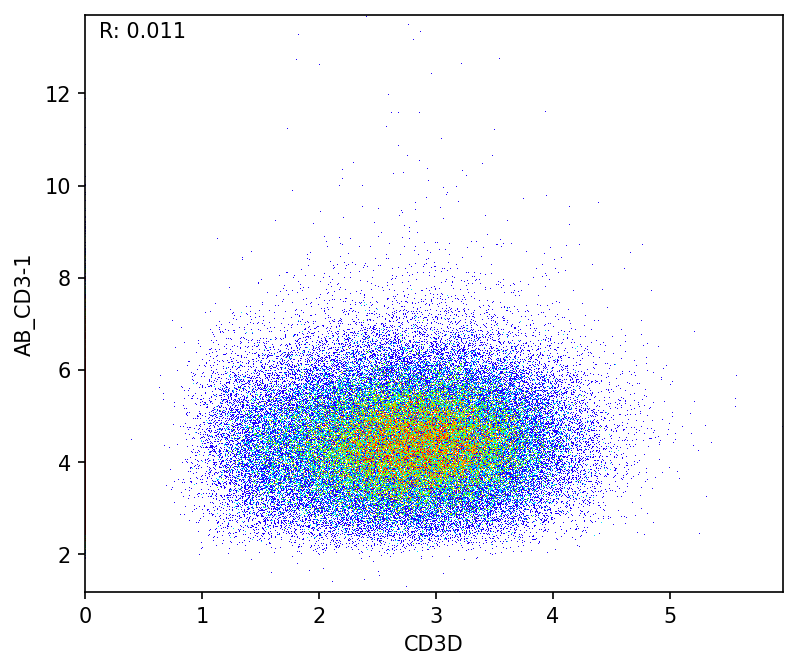

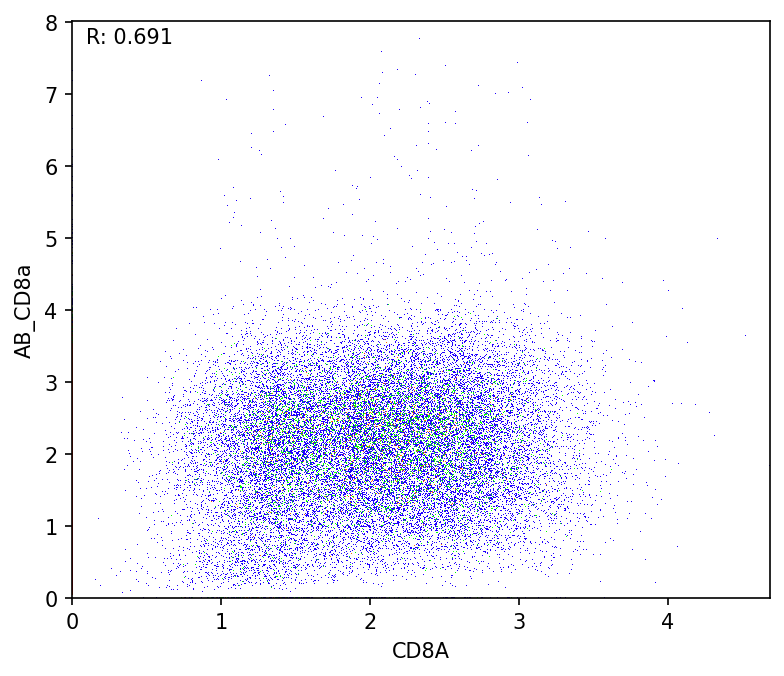

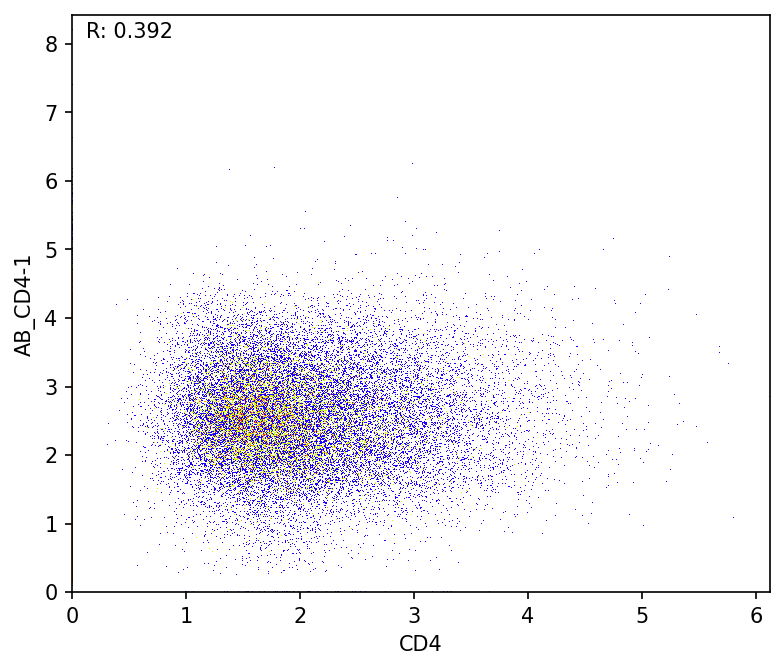

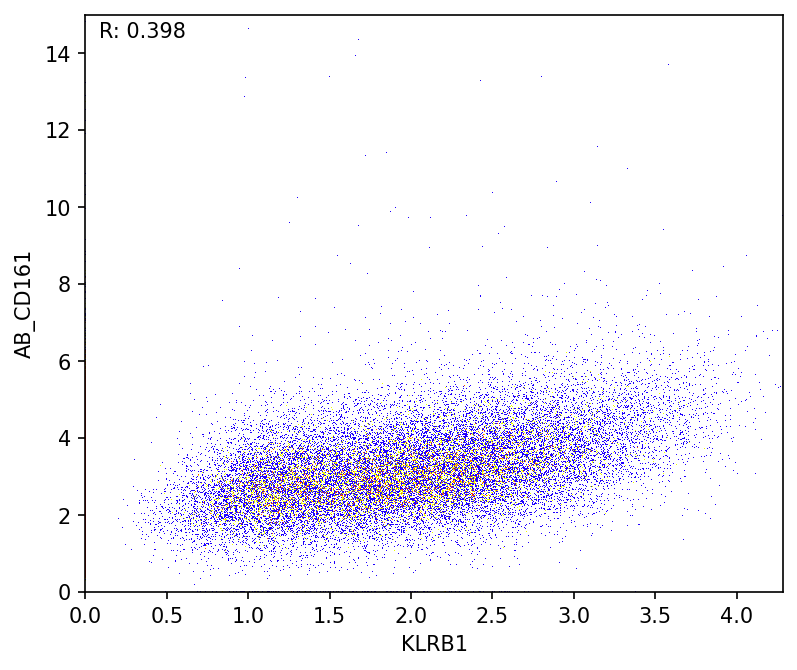

In [208]:
for (gene, prot) in prot_pairs:
    # print(gene, prot)
    r, _ = pearsonr(unsmoothed_markers[gene], unsmoothed_markers[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':unsmoothed_markers[gene], 'y':unsmoothed_markers[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(gene)
    ax.set_ylabel(prot)

# Lineage marker gating - RNA and proteins

In [209]:
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)
    
def gate(data, g1, g2, ind=None, vertical_gate=None, horizontal_gate=None, quadrant_gate=None,
         labfontsize=9, plot_labeled=False, upper_only=False, ax=None):
    
    
    if ax is None:
        fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
        gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
        ax = fig.add_subplot(gs[0])

    if ind  is None:
        ind = pd.Series(np.array([True]*data.shape[0]), data.index)
    
    
    x = data.loc[ind, g1]
    y = data.loc[ind, g2]
    
    dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    ax.set_xlabel(g1, fontsize=labfontsize)
    ax.set_ylabel(g2, fontsize=labfontsize)

    
    if vertical_gate is not None:
        xlim = ax.get_xlim()
        ax.hlines(y=vertical_gate['vthresh'], xmin=xlim[0], xmax=xlim[1], linestyle='--', color='k', linewidth=1)
        ax.set_xlim(xlim)
        
            
        initial_res = (data.loc[ind, g2]>vertical_gate['vthresh']).replace({True:vertical_gate['above_name'], False:vertical_gate['below_name']})
        final_res = ind.copy()
        final_res.loc[ind] = initial_res
        final_res.loc[~ind] = np.nan
    elif horizontal_gate is not None:
        ylim = ax.get_ylim()
        ax.vlines(x=horizontal_gate['hthresh'], ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', linewidth=1)
        ax.set_ylim(ylim)
        
        initial_res = (data.loc[ind, g1]>horizontal_gate['hthresh']).replace({False:horizontal_gate['left_name'], True:horizontal_gate['right_name']})
        final_res = ind.copy()
        final_res.loc[ind] = initial_res
        final_res.loc[~ind] = np.nan
        
        
    elif quadrant_gate is not None:
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        if not upper_only:
            ax.hlines(y=quadrant_gate['vthresh'], xmin=xlim[0]-1, xmax=xlim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_xlim(xlim)
            ax.vlines(x=quadrant_gate['hthresh'], ymin=ylim[0]-1, ymax=ylim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_ylim(ylim)
        else:
            ax.hlines(y=quadrant_gate['vthresh'], xmin=quadrant_gate['hthresh'], xmax=xlim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_xlim(xlim)
            ax.vlines(x=quadrant_gate['hthresh'], ymin=quadrant_gate['vthresh'], ymax=ylim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_ylim(ylim)            
            

        indh = data.loc[ind, g1]> quadrant_gate['hthresh']
        indv = data.loc[ind, g2]> quadrant_gate['vthresh']
        final_res = ind.replace(False,np.nan)
        for hval,vval, lab in [[False, False, quadrant_gate['ll']], [True, False, quadrant_gate['lr']], [False, True, quadrant_gate['ul']], [True, True, quadrant_gate['ur']]]:
            tolab = (indh==hval) & (indv==vval)
            final_res.loc[tolab.index[tolab]] = lab
            
            
    if plot_labeled:
        fig = plt.figure(constrained_layout=True, figsize=(2.4, 2.), dpi=200)
        gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.8, top=.92)
        ax2 = fig.add_subplot(gs[0])
        dat = pd.concat([x,y,final_res], axis=1)
        dat.columns = [g1, g2, 'label']
        for (k,g) in dat.groupby('label'):
            ax2.scatter(g[g1], g[g2], label=k, s=.5, edgecolor='None')
        ax2.legend(bbox_to_anchor=(1,1), markerscale=3, fontsize=6)
        
        
        
    return(final_res, ax)

In [210]:
gating = pd.DataFrame(index=markers_magic.index, columns=['T_vs_B','gdT', 'MAIT', 'CD4_vs_CD8', 'Treg', 'CD4_Conv', 'CD8_Conv'])

Text(7, 8, 'B')

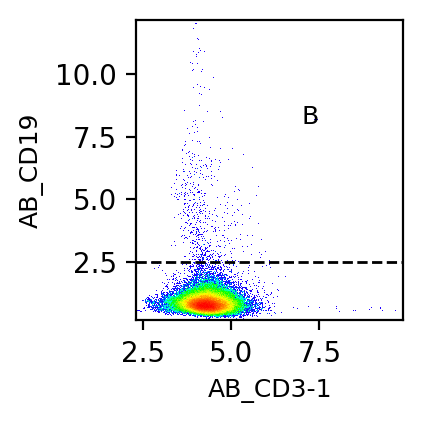

In [215]:
g1 = 'AB_CD3-1'
g2 = 'AB_CD19'   
vgate = {'vthresh':2.5, 'above_name':'B', 'below_name':'T'}
gating['T_vs_B'], ax = gate(markers_magic, g1, g2, ind=None, vertical_gate=vgate, plot_labeled=False)
ax.text(7,8, 'B', fontsize=9)

Text(1.7, 4, 'gdT')

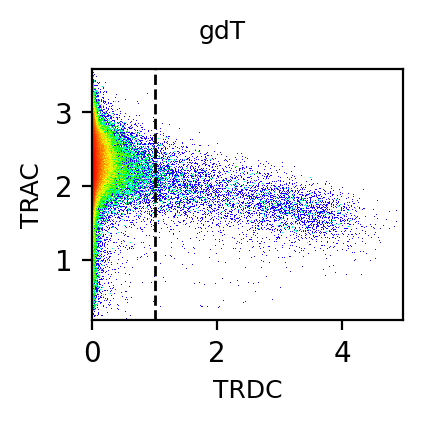

In [219]:
'TRAC', 'TRGC1', 'TRDC', 'KLRB1', 'SLC4A10', 'TRBC1', 

g1 = 'TRDC'
g2 = 'TRAC'   
hgate = {'hthresh':1, 'right_name':'gdT', 'left_name':'T'}
gating['gdT'], ax = gate(markers_magic, g1, g2, ind=None, horizontal_gate=hgate, plot_labeled=False)
ax.text(1.7,4, 'gdT', fontsize=9)

Text(1, 6, 'MAIT')

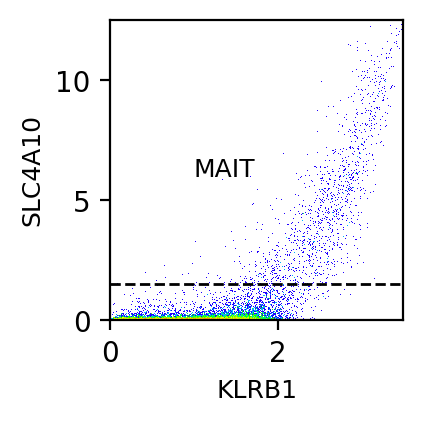

In [220]:
g1 = 'KLRB1'
g2 = 'SLC4A10'   
vgate = {'vthresh':1.5, 'above_name':'MAIT', 'below_name':'T'}
gating['MAIT'], ax = gate(markers_magic, g1, g2, ind=(gating['gdT']=='T'), vertical_gate=vgate, plot_labeled=False)
ax.text(1,6, 'MAIT', fontsize=9)

Text(3, 0.6, 'CD4')

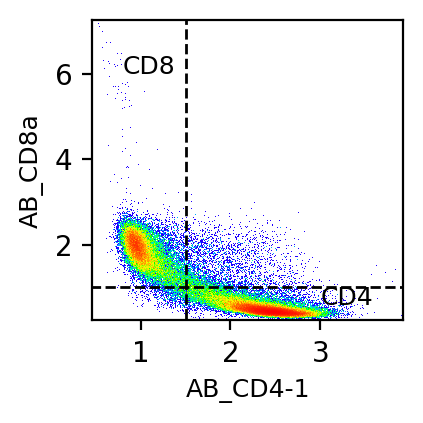

In [221]:
g1 = 'AB_CD4-1'
g2 = 'AB_CD8a'   
quadrant_gate = {'vthresh':1, 'hthresh':1.5 , 'll':'DN', 'lr':'CD4', 'ur':'DP', 'ul':'CD8'}
gating['CD4_vs_CD8'], ax = gate(markers_magic, g1, g2, ind=(gating['MAIT']=='T'), quadrant_gate=quadrant_gate, plot_labeled=False)
ax.text(.8,6, 'CD8', fontsize=9)
ax.text(3,.6, 'CD4', fontsize=9)

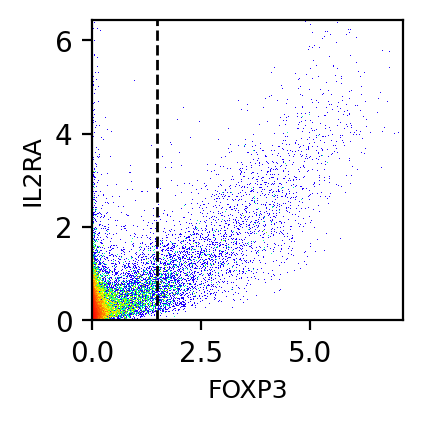

In [222]:
g1 = 'FOXP3'
g2 = 'IL2RA'   
horizontal_gate = {'hthresh':1.5 , 'left_name':'CD4', 'right_name':'Treg'}
gating['Treg'], ax = gate(markers_magic, g1, g2, ind=(gating['CD4_vs_CD8']=='CD4'), horizontal_gate=horizontal_gate, plot_labeled=False)
#ax.text(.8,6, 'CD8', fontsize=9)
#ax.text(3,.6, 'CD4', fontsize=9)

Text(0.8, 2.35, 'CD4 CM')

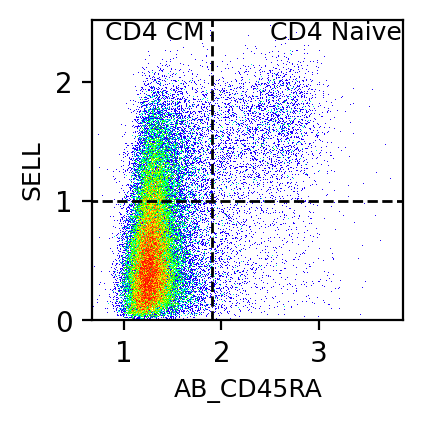

In [223]:
g1 = 'AB_CD45RA'
g2 = 'SELL'

quadrant_gate = {'vthresh':1, 'hthresh':1.9 , 'll':'CD4_EM', 'lr':'CD4_TEMRA', 'ur':'CD4_Naive', 'ul':'CD4_CM'}
gating['CD4_Conv'], ax = gate(markers_magic, g1, g2, ind=(gating['Treg']=='CD4'), quadrant_gate=quadrant_gate, plot_labeled=False)
ax.text(2.5,2.35, 'CD4 Naive', fontsize=9)
ax.text(.8,2.35, 'CD4 CM', fontsize=9)


Text(0.8, 2.35, 'CD8 CM')

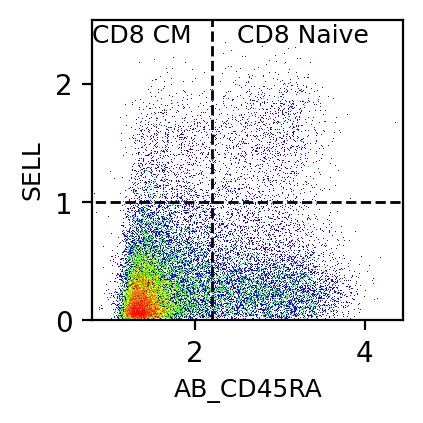

In [224]:
g1 = 'AB_CD45RA'
g2 = 'SELL'

quadrant_gate = {'vthresh':1, 'hthresh':2.2 , 'll':'CD8_EM', 'lr':'CD8_TEMRA', 'ur':'CD8_Naive', 'ul':'CD8_CM'}
gating['CD8_Conv'], ax = gate(markers_magic, g1, g2, ind=(gating['CD4_vs_CD8']=='CD8'), quadrant_gate=quadrant_gate, plot_labeled=False)
ax.text(2.5,2.35, 'CD8 Naive', fontsize=9)
ax.text(.8,2.35, 'CD8 CM', fontsize=9)


In [225]:
label = gating.apply(lambda x: x[x.last_valid_index()], axis=1)

In [226]:
label.value_counts()

CD4_EM       36461
CD8_EM       18840
CD4_CM       10814
CD8_TEMRA     6435
gdT           5172
DP            3785
Treg          3315
CD4_Naive     3089
CD8_Naive     1407
MAIT          1264
CD8_CM        1237
CD4_TEMRA     1165
DN            1064
Name: count, dtype: int64

In [232]:
outfn = os.path.join(outdir, 'ManualGating.Magic.20240930.tsv')
print(outfn)

../../../Data/PerDataset/AMPRA/ManualGating.Magic.20240930.tsv


In [233]:
gating.to_csv(outfn, sep='\t')

In [234]:
outfn = os.path.join(outdir, 'ManualGating.Magic.FinalLabel.20240930.tsv')
print(outfn)

../../../Data/PerDataset/AMPRA/ManualGating.Magic.FinalLabel.20240930.tsv


In [235]:
label.to_csv(outfn, sep='\t')

In [236]:
os.path.abspath(outfn)

'/data/srlab1/TCAT/Data/PerDataset/AMPRA/ManualGating.Magic.FinalLabel.20240930.tsv'

# Overlap with GEPs

In [237]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params.loc['COMBAT', 'tcat_fn']

'/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.20231016.FiltSingletons.Rescaled.COMBAT.tsv'

In [238]:
tcat_gep_info = read_dataset_log('cGEP_Name')
tcat_gep_info.head()

,cGep_Name,Old_Short_Name,Long_Name,Short_Name,Shortest_Name,Class,Num_Datasets,Notes,Reviewed,Filter
0,COMBAT_Cytoskeleton,Cytoskeleton,Actin Cytoskeleton,Cytoskeleton,Cytosk.,Functional,7,NaN,Y,NaN
1,CD8_EM,CD8-EM,CD8 Effector Memory,CD8-EM,CD8-EM,Lineage,7,Need to confirm overlap with gating since the ...,Y,NaN
2,CellCycle-G2M,CellCycle-G2M,Cell Cycle G2M Phase,CellCycle-G2M,G2M-phase,Functional,7,NaN,Y,NaN
3,CellCycle-S,CellCycle-S,Cell Cycle S Phase,CellCycle-S,S-phase,Functional,7,NaN,Y,NaN
4,Cytotoxic,Cytotoxic,Cytotoxic,Cytotoxic,Cytotoxic,Functional,7,NaN,Y,NaN


In [239]:
renmap = dict(zip(tcat_gep_info['cGep_Name'], tcat_gep_info['Short_Name']))

In [240]:
tcat_usage = pd.read_csv(params.loc['AMP-RA', 'tcat_fn'], sep='\t', index_col=0).rename(columns=renmap)

In [241]:
tcat_usage_norm = tcat_usage.div(tcat_usage.sum(axis=1), axis=0)

In [242]:
tcat_usage_norm.head()

,CellCycle-G2M,Translation,HLA,ISG,Mito,Doublet-RBC,gdT,CellCycle-S,Cytotoxic,Doublet-Platelet,...,Tfh-2,OX40/EBI3,CD172a/MERTK,IEG3,Doublet-Fibroblast,SOX4/TOX2,CD40LG/TXNIP,Tph,Exhaustion,Tfh-1
BRI-399_AAACGAATCTGCATGA,0.001038,2.612040e-02,0.003684,0.001900,0.002439,0.000695,0.002736,0.002186,0.008307,0.008808,...,0.003477,0.003261,0.072440,0.061290,0.063067,0.005426,0.092357,0.002629,0.003716,0.004308
BRI-399_AAACGCTTCCTTGACC,0.000607,2.677540e-07,0.005257,0.026867,0.020592,0.000489,0.021852,0.007564,0.017953,0.030330,...,0.002284,0.003821,0.000077,0.000027,0.258754,0.007630,0.002795,0.002731,0.011667,0.026190
BRI-399_AAAGGGCAGCCGGAAT,0.000208,2.512893e-04,0.004975,0.000205,0.000156,0.000632,0.005665,0.001940,0.000578,0.010467,...,0.020819,0.015690,0.003089,0.024834,0.215833,0.041257,0.057163,0.006290,0.009659,0.009506
BRI-399_AAAGGGCCACTATGTG,0.002002,1.572197e-05,0.024665,0.003690,0.000146,0.000547,0.030107,0.001764,0.022393,0.001231,...,0.001682,0.003821,0.000607,0.000089,0.098537,0.005345,0.003486,0.010658,0.032946,0.016355
BRI-399_AAAGGTAGTGCAGGAT,0.000378,2.439907e-04,0.003139,0.003949,0.001677,0.000507,0.009709,0.001582,0.010546,0.001003,...,0.000624,0.028187,0.000799,0.003900,0.094384,0.019081,0.000709,0.006932,0.002121,0.000174


In [243]:
tcat_gep_info.loc[tcat_gep_info['Class'] == 'Lineage', :]

,cGep_Name,Old_Short_Name,Long_Name,Short_Name,Shortest_Name,Class,Num_Datasets,Notes,Reviewed,Filter
1,CD8_EM,CD8-EM,CD8 Effector Memory,CD8-EM,CD8-EM,Lineage,7,Need to confirm overlap with gating since the ...,Y,NaN
7,MAIT,MAIT,MAIT,MAIT,MAIT,Lineage,7,NaN,Y,NaN
8,Treg,Treg,Treg,Treg,Treg,Lineage,7,NaN,Y,NaN
9,CD4-Naive_TBRU,CD4-Naive,CD4 Naive,CD4-Naive,CD4-Naive,Lineage,6,NaN,Y,NaN
16,KLRC2/GNLY_gdT,NK-like,TEMRA,TEMRA,TEMRA,Lineage,6,NaN,Y,NaN
17,CD4 TCM_Tfh,CD4-CM,CD4 T Central Memory,CD4-CM,CD4-CM,Lineage,5,NaN,Y,NaN
23,gdT-Blood,gdT-Blood,Gamma Delta T,gdT,gdT,Lineage,4,NaN,Y,NaN
27,S100A10/LMNA,CCR10-Migration,Th22,Th22,Th22,Lineage,4,NaN,Y,NaN
28,Th17,Th17,Th17 Resting,Th17-Resting,Th17-Rest.,Lineage,4,Need to confirm enrichment for TH17 geneset,Y,NaN
29,Th2,Th2-1,Th2 Resting,Th2-Resting,Th2-Rest.,Lineage,4,NaN,Y,NaN


In [244]:
tcat_usage_norm.columns

Index(['CellCycle-G2M', 'Translation', 'HLA', 'ISG', 'Mito', 'Doublet-RBC',
       'gdT', 'CellCycle-S', 'Cytotoxic', 'Doublet-Platelet', 'NME1/FABP5',
       'Th22', 'MAIT', 'CellCycle-Late-S', 'Cytoskeleton', 'Heatshock',
       'Multi-Cytokine', 'TEMRA', 'Doublet-Myeloid', 'Metallothionein',
       'CD4-CM', 'IEG', 'CD8-EM', 'IEG2', 'CD4-Naive', 'Treg', 'Th17-Resting',
       'Poor-Quality', 'CD8-Naive', 'RGCC/MYADM', 'TIMD4/TIM3',
       'Doublet-Plasmablast', 'BCL2/FAM13A', 'IL10/IL19', 'Th2-Activated',
       'Th2-Resting', 'ICOS/CD38', 'Doublet-Bcell', 'Th1-Like', 'CTLA4/CD38',
       'CD8-Trm', 'Th17-Activated', 'Tfh-2', 'OX40/EBI3', 'CD172a/MERTK',
       'IEG3', 'Doublet-Fibroblast', 'SOX4/TOX2', 'CD40LG/TXNIP', 'Tph',
       'Exhaustion', 'Tfh-1'],
      dtype='object')

In [245]:
outfn = os.path.join(outdir, 'ManualGating.Magic.FinalLabel.20240930.tsv')
print(outfn)

../../../Data/PerDataset/AMPRA/ManualGating.Magic.FinalLabel.20240930.tsv


In [246]:
label = pd.read_csv(outfn, sep='\t', index_col=0)['0']
label.head()

BRI-399_AAACGAATCTGCATGA       CD4_EM
BRI-399_AAACGCTTCCTTGACC    CD4_TEMRA
BRI-399_AAAGGGCAGCCGGAAT         Treg
BRI-399_AAAGGGCCACTATGTG          gdT
BRI-399_AAAGGTAGTGCAGGAT         Treg
Name: 0, dtype: object

In [247]:
tcat_gep_info.loc[tcat_gep_info['Class'] != 'Lineage', 'Short_Name'].dropna()

0            Cytoskeleton
2           CellCycle-G2M
3             CellCycle-S
4               Cytotoxic
5             Doublet-RBC
6                     ISG
10       CellCycle-Late-S
11                    HLA
12             NME1/FABP5
13                    IEG
14           Poor-Quality
15            Translation
18       Doublet-Platelet
19              IL10/IL19
20             RGCC/MYADM
21                   Mito
22    Doublet-Plasmablast
24        Metallothionein
25                   IEG2
26         Multi-Cytokine
30            BCL2/FAM13A
34             CTLA4/CD38
35          Doublet-Bcell
36        Doublet-Myeloid
37              Heatshock
39          Th2-Activated
40              OX40/EBI3
41              ICOS/CD38
42         Th17-Activated
43              SOX4/TOX2
44             TIMD4/TIM3
45     Doublet-Fibroblast
46           CD40LG/TXNIP
47           CD172a/MERTK
48                   IEG3
51             Exhaustion
Name: Short_Name, dtype: object

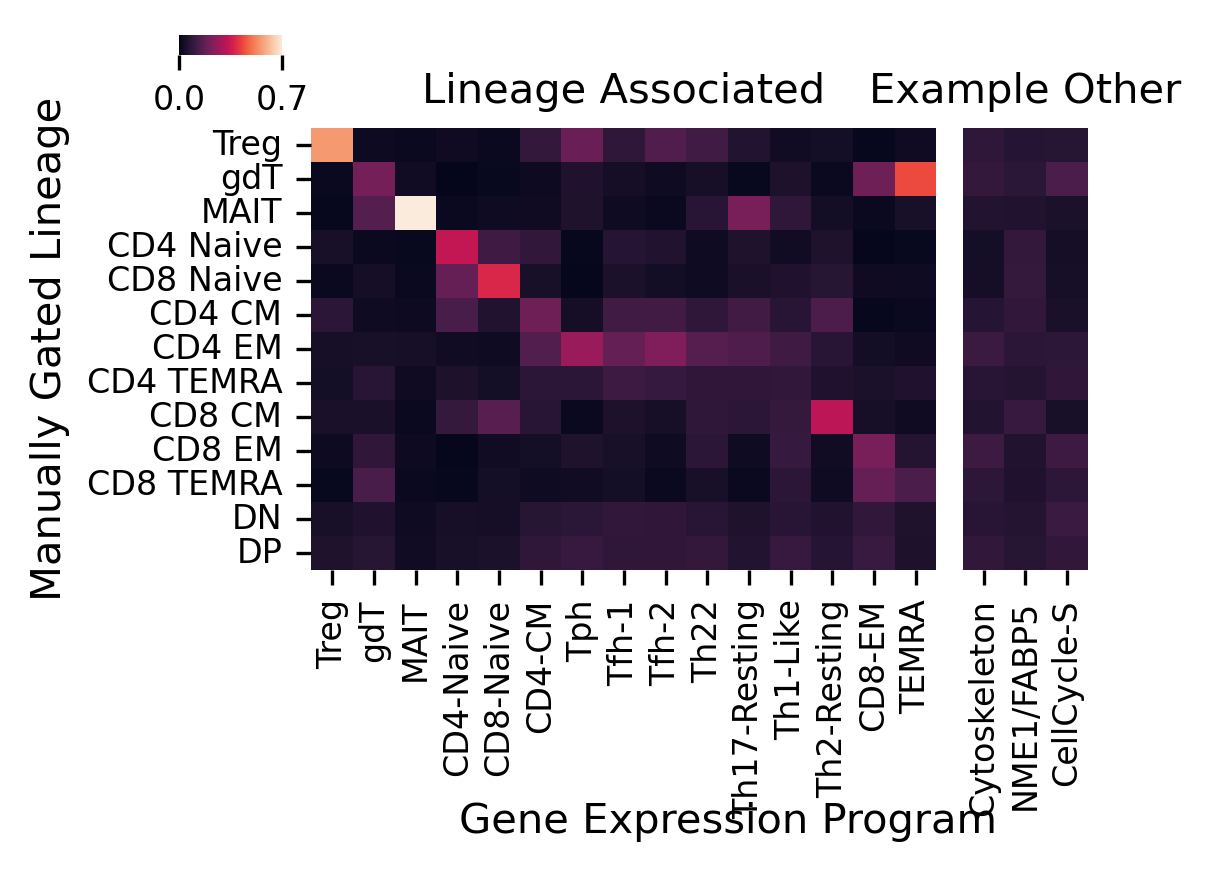

In [248]:
cluster = tcat_usage_norm.groupby(label).mean()

lineage_order = ['Treg', 'gdT', 'MAIT','CD4_Naive',  'CD8_Naive', 'CD4_CM', 'CD4_EM', 'CD4_TEMRA', 
                 'CD8_CM', 'CD8_EM',  'CD8_TEMRA',
                 'DN', 'DP',  ]


max_usage = cluster.max(axis=0).sort_values(ascending=False)


lineage_geps = ['Treg', 'gdT', 'MAIT', 'CD4-Naive', 'CD8-Naive',  'CD4-CM', 'Tph', 'Tfh-1', 'Tfh-2', 'Th22',
                'Th17-Resting', 'Th1-Like',  'Th2-Resting',  'CD8-EM', 'TEMRA']
other_geps = ['Cytoskeleton', 'NME1/FABP5', 'CellCycle-S']

gep_order = lineage_geps + other_geps

cluster = cluster.loc[lineage_order, gep_order]


cluster_norm = cluster.div(cluster.sum(axis=0), axis=1)
vmax=0.7


frac_lineage = (len(lineage_geps) / len(lineage_geps+other_geps))
frac_other = 1-frac_lineage



fig = plt.figure(figsize=(4, 3), dpi=300)
gs = gridspec.GridSpec(2, 3, width_ratios=[0.05, frac_lineage, frac_other], height_ratios=[.1,.9], wspace=0.1, bottom=0.3, top=.9, left=0.2)

# Colorbar axis
top_ax = fig.add_subplot(gs[0, 0:2])
lin_ax = fig.add_subplot(gs[1,1])
other_ax = fig.add_subplot(gs[1, 2])
top_ax.axis('off')


cax = top_ax.inset_axes([-0.1, .5, 0.15, 0.4], transform=top_ax.transAxes)
#fig.colorbar(scim, ax=axes[x,y], cax=cax, orientation='horizontal')



sns.heatmap(cluster_norm.loc[:,lineage_geps], ax=lin_ax, cbar_ax=cax,
            xticklabels=True, cbar_kws={'orientation':'horizontal', 'ticks':[0,vmax], 'shrink':0.1, 'aspect':30},
            vmin=0, vmax=vmax)
sns.heatmap(cluster_norm.loc[:,other_geps], ax=other_ax, cbar=False, vmin=0, vmax=vmax, xticklabels=True)
other_ax.set_yticks([])
lin_ax.set_ylabel('Manually Gated Lineage', fontsize=10)
other_ax.set_ylabel('')
fig.text(0.6, 0.02, 'Gene Expression Program', ha='center', va='center', fontsize=10)

lin_ax.set_yticks(np.arange(cluster_norm.shape[0])+0.5)
lin_ax.set_yticklabels([x.replace('_', ' ') for x in cluster_norm.index], fontsize=8)

lin_ax.set_xticks(np.arange(len(lineage_geps))+0.5)
lin_ax.set_xticklabels(lineage_geps, fontsize=8)

other_ax.set_xticks(np.arange(len(other_geps))+0.5)
other_ax.set_xticklabels([x.replace('-Secretion', '') for x in other_geps], fontsize=8)

lin_ax.set_title('Lineage Associated', fontsize=10)
other_ax.set_title('Example Other', fontsize=10)


cax.tick_params(labelsize=8)

#plt.savefig(os.path.join(figdir, 'LineageAssociate_COMBAT_Relative.png'))
#plt.savefig(os.path.join(figdir, 'LineageAssociate_COMBAT_Relative.pdf'))

# Run TCAT and quantify agreement with multinomial label

In [249]:
tcat = starCAT(reference='TCAT.V1', cachedir='../../../Data/')

Using reference from starCAT database
Loading reference from existing cache file for reference TCAT.V1


In [250]:
adata = sc.read(params.loc['AMP-RA', 'raw_counts_filt_fn'])

Only considering the two last: ['.FiltForcNMF', '.h5ad'].
Only considering the two last: ['.FiltForcNMF', '.h5ad'].


In [251]:
usage, scores = tcat.fit_transform(adata)

3412 out of 3412 genes in the reference overlap with the query


/PHShome/dk718/miniforge3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [252]:
ct = pd.crosstab(label.loc[scores.index].rename('Gating'), scores['Multinomial_Label'])
ct

Multinomial_Label,CD4_CM,CD4_EM,CD4_Naive,CD8_CM,CD8_EM,CD8_Naive,CD8_TEMRA,MAIT,Treg,gdT
Gating,,,,,,,,,,
CD4_CM,4640,183,4963,255,0,113,1,1,655,3
CD4_EM,17259,9362,4006,2079,846,365,872,182,975,515
CD4_Naive,182,8,2716,16,1,117,0,0,47,2
CD4_TEMRA,284,154,306,91,22,70,154,0,25,59
CD8_CM,151,9,247,391,9,366,10,0,43,11
CD8_EM,346,569,444,6043,5516,1441,3733,72,65,611
CD8_Naive,21,2,287,94,3,986,3,0,4,7
CD8_TEMRA,49,71,195,969,905,705,3023,12,6,500
DN,184,97,205,133,98,110,165,8,31,33


In [253]:
ct.div(ct.sum(axis=1), axis=0)

Multinomial_Label,CD4_CM,CD4_EM,CD4_Naive,CD8_CM,CD8_EM,CD8_Naive,CD8_TEMRA,MAIT,Treg,gdT
Gating,,,,,,,,,,
CD4_CM,0.429073,0.016923,0.458942,0.023581,0.000000,0.010449,0.000092,0.000092,0.060570,0.000277
CD4_EM,0.473355,0.256768,0.109871,0.057020,0.023203,0.010011,0.023916,0.004992,0.026741,0.014125
CD4_Naive,0.058919,0.002590,0.879249,0.005180,0.000324,0.037876,0.000000,0.000000,0.015215,0.000647
CD4_TEMRA,0.243777,0.132189,0.262661,0.078112,0.018884,0.060086,0.132189,0.000000,0.021459,0.050644
CD8_CM,0.122070,0.007276,0.199677,0.316087,0.007276,0.295877,0.008084,0.000000,0.034762,0.008892
CD8_EM,0.018365,0.030202,0.023567,0.320754,0.292781,0.076486,0.198142,0.003822,0.003450,0.032431
CD8_Naive,0.014925,0.001421,0.203980,0.066809,0.002132,0.700782,0.002132,0.000000,0.002843,0.004975
CD8_TEMRA,0.007615,0.011033,0.030303,0.150583,0.140637,0.109557,0.469775,0.001865,0.000932,0.077700
DN,0.172932,0.091165,0.192669,0.125000,0.092105,0.103383,0.155075,0.007519,0.029135,0.031015


In [255]:
balanced_accuracy_score(label.loc[scores.index].rename('Gating'), scores['Multinomial_Label'])

0.38379046498623975